In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [65]:
deaths = pd.read_excel("Indicator_Annual number of AIDS deaths.xlsx")
peoplewithaids = pd.read_excel("indicator_hiv_plwha.xlsx")
expectativadevida = pd.read_excel('indicator life_expectancy_at_birth.xlsx')
newlyinfected = pd.read_excel("Indicator_Estimated new HIV cases All ages.xlsx")
totalpopulation = pd.read_excel("population_total_updated.xlsx")

#https://aidsinfo.unaids.org/
newlyinfected_south_eastern_africa_2018 = pd.read_excel("New HIV infections_Number of new HIV infections_Population_2018.xlsx")
newlyinfected_south_eastern_africa_2017 =pd.read_excel("New HIV infections_Number of new HIV infections_Population_2017.xlsx")
receivingART_south_eastern_africa_2017 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2017.xlsx")
receivingART_south_eastern_africa_2018 = pd.read_excel("Treatment cascade_People living with HIV receiving ART (#)_Population_ All ages_2018.xlsx")
livingwithHIV2017 = pd.read_excel("People living with HIV 2017.xlsx")
livingwithHIV2018 = pd.read_excel("People living with HIV 2018.xlsx")

In [67]:
peoplewithaids=peoplewithaids.rename(columns = {"People living with HIV":'Pessoas vivendo com HIV', "1996": 1996, "2001":2001})
peoplewithaids_idx=peoplewithaids.set_index("Pessoas vivendo com HIV")
peoplewithaids_idx=peoplewithaids_idx.dropna()

#--------------------------------------- OLHAR AQUI
deaths=deaths.rename(columns = {"Annual number of AIDS deaths":'Mortes por AIDS'})
deaths_idx=deaths.set_index("Mortes por AIDS")
deaths_idx.columns = deaths_idx.columns.astype(int)
deaths_idx=deaths_idx.dropna()

expectativadevida=expectativadevida.rename(columns={"Life expectancy":"Expectativa de vida"})
expectativadevida_idx=expectativadevida.set_index("Expectativa de vida")
expectativadevida_idx=expectativadevida_idx.dropna()

newlyinfected=newlyinfected.rename(columns={"Estimated new HIV infections":"Incidencia de HIV em novas pessoas"})
newlyinfected_idx=newlyinfected.set_index("Incidencia de HIV em novas pessoas")
newlyinfected_idx=newlyinfected_idx.dropna()

totalpopulation=totalpopulation.rename(columns={"country":"População total"})
totalpopulation_idx=totalpopulation.set_index("População total")
totalpopulation_idx=totalpopulation_idx.dropna()

newlyinfected_south_eastern_africa_2017=newlyinfected_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Novos infectados em 2017"})
newlyinfected_south_eastern_africa_idx2017=newlyinfected_south_eastern_africa_2017.set_index("Países")

newlyinfected_south_eastern_africa_2018=newlyinfected_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Novos infectados em 2018"})
newlyinfected_south_eastern_africa_idx2018=newlyinfected_south_eastern_africa_2018.set_index("Países")

receivingART_south_eastern_africa_2017=receivingART_south_eastern_africa_2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Recebendo ART em 2017"})
receivingART_south_eastern_africa_idx2017=receivingART_south_eastern_africa_2017.set_index("Países")

receivingART_south_eastern_africa_2018=receivingART_south_eastern_africa_2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Recebendo ART em 2018"})
receivingART_south_eastern_africa_idx2018=receivingART_south_eastern_africa_2018.set_index("Países")

livingwithHIV2017=livingwithHIV2017.rename(columns={"Selected Regions":"Países", "For The Year 2017":"Pessoas com HIV em 2017"})
livingwithHIV2017_idx=livingwithHIV2017.set_index("Países")

livingwithHIV2018=livingwithHIV2018.rename(columns={"Selected Regions":"Países", "For The Year 2018":"Pessoas com HIV em 2018"})
livingwithHIV2018_idx=livingwithHIV2018.set_index("Países")

In [77]:
#convertendo tabelas e plotando comportamento relativo médio
peoplewithaids_num = peoplewithaids_idx.apply(pd.to_numeric)
totalpopulation_num = totalpopulation_idx.apply(pd.to_numeric)
peoplewithaids_num.columns = peoplewithaids_num.columns.astype(int)
totalpopulation_num.columns = totalpopulation_num.columns.astype(int)

comportamentorelativo_peoplewithaids= peoplewithaids_num/totalpopulation_num


**Gráfico de comportamento relativo ao longo dos anos - PESSOAS COM AIDS**

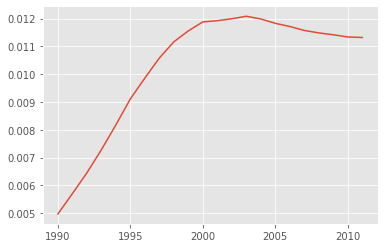

In [69]:
plt.plot(comportamentorelativo_peoplewithaids.mean().index, comportamentorelativo_peoplewithaids.mean())

**Comportamento relativo médio - MORTE - todos os países**

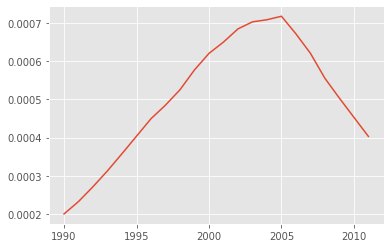

In [70]:
deaths_num = deaths_idx.apply(pd.to_numeric)
deaths_num.columns = deaths_num.columns.astype(int)
comportamentorelativo_mortes= deaths_num/totalpopulation_num

plt.plot(comportamentorelativo_mortes.mean().index, comportamentorelativo_mortes.mean())

**Comportamento relativo médio - NOVAS INFECÇÕES - todos os países**

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
           dtype='int64', length=301)

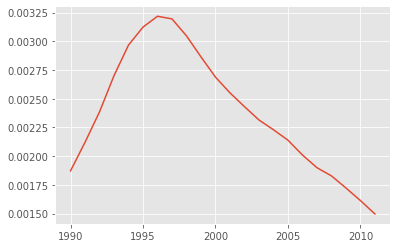

In [133]:
newlyinfected_idx = newlyinfected_idx.apply(pd.to_numeric)
newlyinfected_idx.columns = newlyinfected_idx.columns.astype(int)

comportamentorelativo_novosinfectados= newlyinfected_idx/totalpopulation_num
plt.plot(comportamentorelativo_novosinfectados.mean().index, comportamentorelativo_novosinfectados.mean())

In [72]:
juncaodosdados=receivingART_south_eastern_africa_idx2017.join(receivingART_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2017, how="inner")
juncaodosdados=juncaodosdados.join(newlyinfected_south_eastern_africa_idx2018, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2017_idx, how="inner")
juncaodosdados=juncaodosdados.join(livingwithHIV2018_idx, how="inner")
juncaodosdados.head()

,Recebendo ART em 2017,Recebendo ART em 2018,Novos infectados em 2017,Novos infectados em 2018,Pessoas com HIV em 2017,Pessoas com HIV em 2018
Países,,,,,,
Angola,78721,88734,29000,28000,320000,330000
Botswana,285983,307377,9000,8500,370000,370000
Comoros,95,96,0,0,120,120
Eritrea,8795,8907,610,580,18000,18000
Ethiopia,437555,449962,23000,23000,680000,690000


In [94]:
listapaises_analise = ['Angola',  'Ethiopia',  'Kenya',  'Lesotho',    'Malawi', 'Namibia',  'Rwanda', 'South Africa',  'Uganda',   'Zimbabwe', 'Madagascar','Mauritius','Sudan']
selftest_not_available=["Angola", "Ethiopia", "Rwanda", 'Uganda', 'Zambia','Botswana',]

juncaodosdados["livingwithHIV2017_idx"] = livingwithHIV2017_idx
juncaodosdados["livingwithHIV2018_idx"] = livingwithHIV2018_idx

juncaodosdados.loc[:, "selftestavailable"] = "sim"
juncaodosdados.loc[selftest_not_available, "selftestavailable"] = "não"

selftest_status_2017= juncaodosdados.selftestavailable.value_counts()
juncaodosdados.head()

,Recebendo ART em 2017,Recebendo ART em 2018,Novos infectados em 2017,Novos infectados em 2018,Pessoas com HIV em 2017,Pessoas com HIV em 2018,livingwithHIV2017_idx,livingwithHIV2018_idx,selftestavailable,Recebendo ART em 2018 relativo,Recebendo ART em 2017 relativo
Países,,,,,,,,,,,
Angola,78721,88734,29000,28000,320000,330000,320000,330000,não,0.002881,0.002642
Botswana,285983,307377,9000,8500,370000,370000,370000,370000,não,0.131921,0.124883
Comoros,95,96,0,0,120,120,120,120,sim,0.000115,0.000117
Eritrea,8795,8907,610,580,18000,18000,18000,18000,sim,0.001716,0.001735
Ethiopia,437555,449962,23000,23000,680000,690000,680000,690000,não,0.004166,0.004167


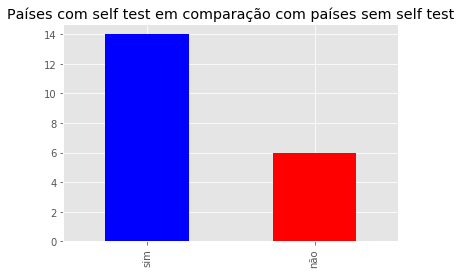

In [74]:
selftest_status_2017.plot(kind='bar', color=('blue', 'red'), legend=False);
plt.title("Países com self test em comparação com países sem self test");

**BoxPlot relativo de pessoas recebem ART**

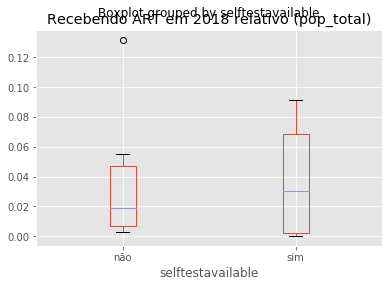

In [152]:
juncaodosdados["Recebendo ART em 2018 relativo (novosinfectados)"]=juncaodosdados["Recebendo ART em 2018"]/juncaodosdados["Novos infectados em 2018"]
juncaodosdados["Recebendo ART em 2017 relativo (novosinfectados)"]=juncaodosdados["Recebendo ART em 2017"]/juncaodosdados["Novos infectados em 2017"]

juncaodosdados["Recebendo ART em 2018 relativo (pessoas com AIDS)"]=juncaodosdados["Recebendo ART em 2018"]/juncaodosdados["Pessoas com HIV em 2018"]
juncaodosdados["Recebendo ART em 2017 relativo (pessoas com AIDS)"]=juncaodosdados["Recebendo ART em 2017"]/juncaodosdados["Pessoas com HIV em 2017"]

juncaodosdados["Recebendo ART em 2018 relativo (pop_total)"]=juncaodosdados["Recebendo ART em 2018"]/totalpopulation_idx[2018]
juncaodosdados["Recebendo ART em 2017 relativo (pop_to tal)"]=juncaodosdados["Recebendo ART em 2017"]/totalpopulation_idx[2017]

juncaodosdados.boxplot(column="Recebendo ART em 2018 relativo (pop_total)", by="selftestavailable");

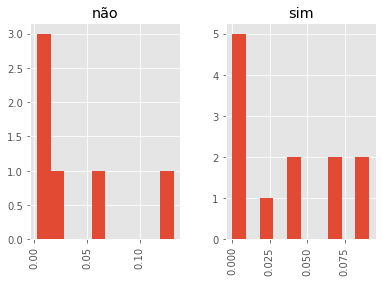

In [85]:
juncaodosdados.hist(column="Recebendo ART em 2018 relativo", by="selftestavailable");

In [ ]:
x1=ART_2017_serie
x2=ART_2018_serie
x=[x1,x2]
y1=ART_2017_serie.mean()
y2=ART_2018_serie.mean()
y=[y1,y2]


plt.plot(x, y)
plt.plot(ART_2017_serie.mean().index, ART_2017_serie.mean())

Int64Index([2017, 2018], dtype='int64')

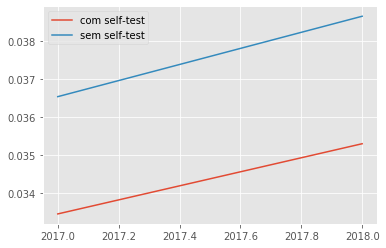

In [155]:
serie_com_self_test=df = pd.DataFrame(columns=[2017, 2018])
serie_sem_self_test=df = pd.DataFrame(columns=[2017, 2018])

serie_com_self_test[2017]=juncaodosdados[juncaodosdados.selftestavailable == "sim"]["Recebendo ART em 2017 relativo (pop_total)"]
serie_com_self_test[2018]=juncaodosdados[juncaodosdados.selftestavailable == "sim"]["Recebendo ART em 2018 relativo (pop_total)"]

serie_sem_self_test[2017]=juncaodosdados[juncaodosdados.selftestavailable == "não"]["Recebendo ART em 2017 relativo (pop_total)"]
serie_sem_self_test[2018]=juncaodosdados[juncaodosdados.selftestavailable == "não"]["Recebendo ART em 2018 relativo (pop_total)"]

plt.plot(serie_com_self_test.mean().index, serie_com_self_test.mean(), label="com self-test")
plt.plot(serie_sem_self_test.mean().index, serie_sem_self_test.mean(), label="sem self-test")
plt.legend()

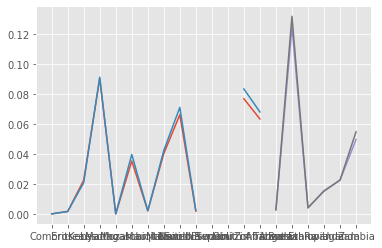

In [154]:
plt.plot(serie_com_self_test.index, serie_com_self_test, label="com self-test")
plt.plot(serie_sem_self_test.index, serie_sem_self_test, label="sem self-test")

Países
Comoros                        0.000115
Eritrea                        0.001716
Kenya                          0.020934
Lesotho                        0.091282
Madagascar                     0.000133
Mozambique                     0.039756
Mauritius                      0.002170
Malawi                         0.042410
Namibia                        0.071137
South Sudan                    0.002382
Eswatini                            NaN
United Republic of Tanzania         NaN
South Africa                   0.083417
Zimbabwe                       0.068079
Name: Recebendo ART em 2018 relativo, dtype: float64

IndexError: too many indices for array